# EDA - Iris dataset

Este documento apresenta uma análise de dados exploratória (EDA - Exploratory Data Analysis) do conjunto [Iris Dataset](https://www.kaggle.com/datasets/uciml/iris). De maneira geral e simplória, o EDA permite um entendimento prévio do conjunto de dados que será utilizado no treinamento de algoritmos de *machine learning*, ou análise de dados, por exemplo. O iris é um conjunto de dados [multivariado](https://www.sciencedirect.com/topics/mathematics/multivariate-data), veja aqui uma definição da [Wikipedia](https://pt.wikipedia.org/wiki/Estat%C3%ADstica_multivari%C3%A1vel).

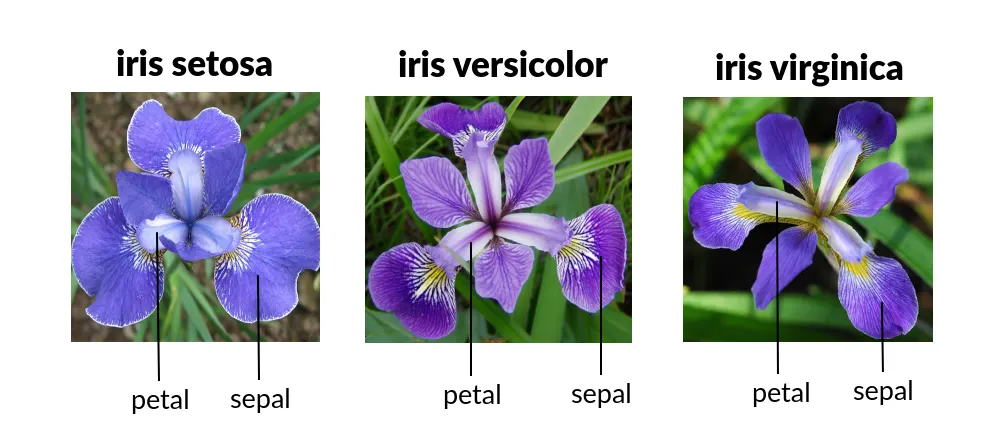

O documento aqui apresentado foi baseado e adaptado dos artigos: [Análise de dados exploratórios: Iris Flower Dataset(Marcelo Nogueira)](https://medium.com/@Locemarn/an%C3%A1lise-de-dados-explorat%C3%B3rios-iris-flower-dataset-611cb68fb78e), [Exploratory Data Analysis : Iris Dataset (Pranshu Sharma)](https://medium.com/analytics-vidhya/exploratory-data-analysis-iris-dataset-4df6f045cda).

## Importação de bibliotecas e leitura dos dados.

A biblioteca [pandas](https://pandas.pydata.org/) foi utilizada para manipular o conjuto de dados,
em seguida, é apresentado O tipo de dados utilizado: ([dataframe](https://pandas.pydata.org/docs/reference/frame.html)).
Na linha 11 é realizada uma cópia do cnjunto de dados original, excluindo o coluna de Id, uma vez que estes dados não são importantes para nossa análise e, podem ocultar ou dificultar análises importantes, como identificação de amostras duplicadas, e elevação da complexidade dos gráficos.

In [1]:
import numpy as np  # Biblioteca matemática do Python
import pandas as pd  # Biblioteca para trabalho com conjuntos de dados (tabelas, dataframes, csv)
import matplotlib.pyplot as plt  # Geração de gráficos
import seaborn as sns  # Geração de gráficos (estatísticos)

iris_data_original = pd.read_csv("raw/Iris.csv")

print(f'\nIris data type: {type(iris_data_original)}\n\n')

#axis: 1 - column, 0 - row
iris_data = iris_data_original.drop('Id', axis='columns')


# iris_data.head(20)






Iris data type: <class 'pandas.core.frame.DataFrame'>




In [2]:
iris_data.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [3]:
"""
Exibe a cauda do conjunto de dados.
"""

iris_data.tail()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

## Sintetizando os dados

As próximas células sintetizam os dados, apresentando o tipo de cada coluna, assim como o título e a quantidade de utilizada.

O comanod describe traz importantes medidas estatísticas por característica.

In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris_data.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

In [6]:

print('Shape: ', iris_data.shape)

# Contagem de amostras por categoria.
iris_data['Species'].value_counts()

#iris_data[]

Shape:  (150, 5)


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### Avaliando a existência de dados ausentes ou nulos

In [7]:
iris_data.isna().sum().sort_values(ascending=False)



SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
iris_data.isnull().sum().sort_values(ascending=False)

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Amostras duplicadas

* A célula seguinte busca por dados duplicados no conjunto. Este tipo de análise é inviabilizado caso o index seja mantido no conjunto.
* O parâmetro *keep*, definido como False, mantém a exibição de todas os dados duplicados. Caso seja omitido, somente a duplicidade será apresentada.

É possível notar a existência de três amostras repetidas. As possíveis soluções são, a exclusão das duplicatas,
ou a manutenção das mesmas e, neste caso, é mais interessante manter as replicas para não desbalancear as amostras.

In [9]:
iris_data[iris_data.duplicated(keep=False)]

#iris_data.duplicated(keep=False)


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
9              4.9           3.1            1.5           0.1     Iris-setosa
34             4.9           3.1            1.5           0.1     Iris-setosa
37             4.9           3.1            1.5           0.1     Iris-setosa
101            5.8           2.7            5.1           1.9  Iris-virginica
142            5.8           2.7            5.1           1.9  Iris-virginica

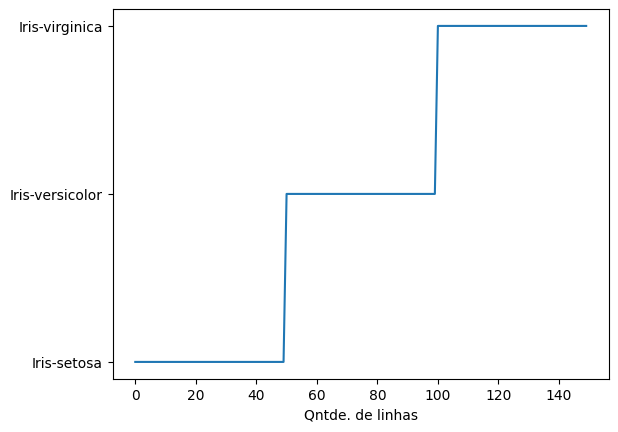

In [10]:
# primeiro plot
plt.plot(iris_data['Species'])
plt.xlabel("Qntde. de linhas")
plt.show()  # segundo plot
plt.hist(iris_data["Species"], color="green")  # to plot a histogram
plt.show()

## Análise univariada

As próximas análises comparam as espécies considerando a largura e comprimento das sépalas e pétalas.


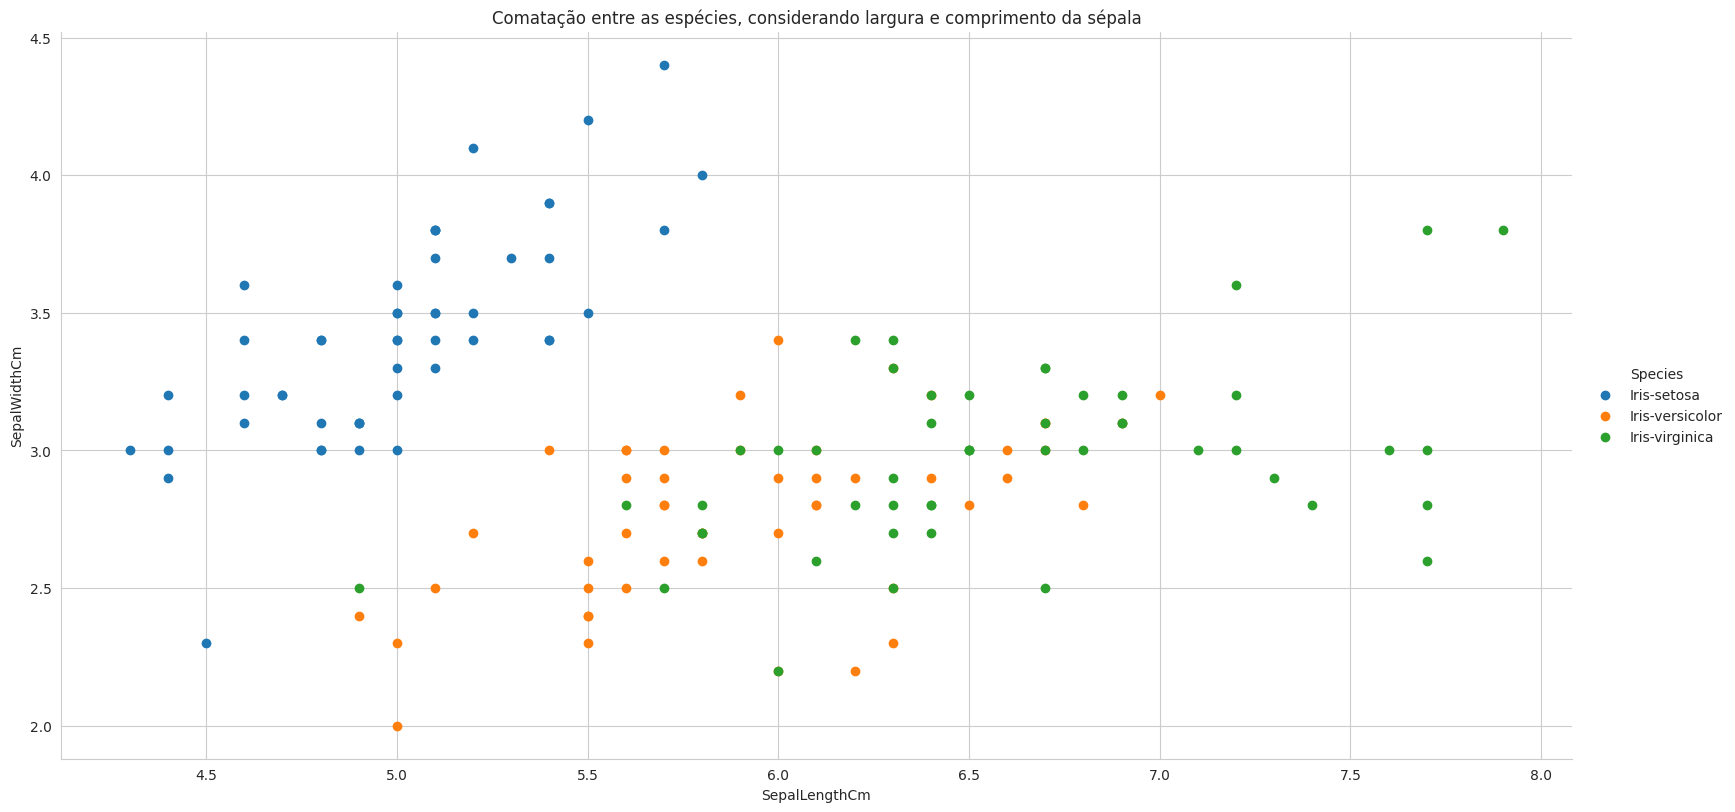

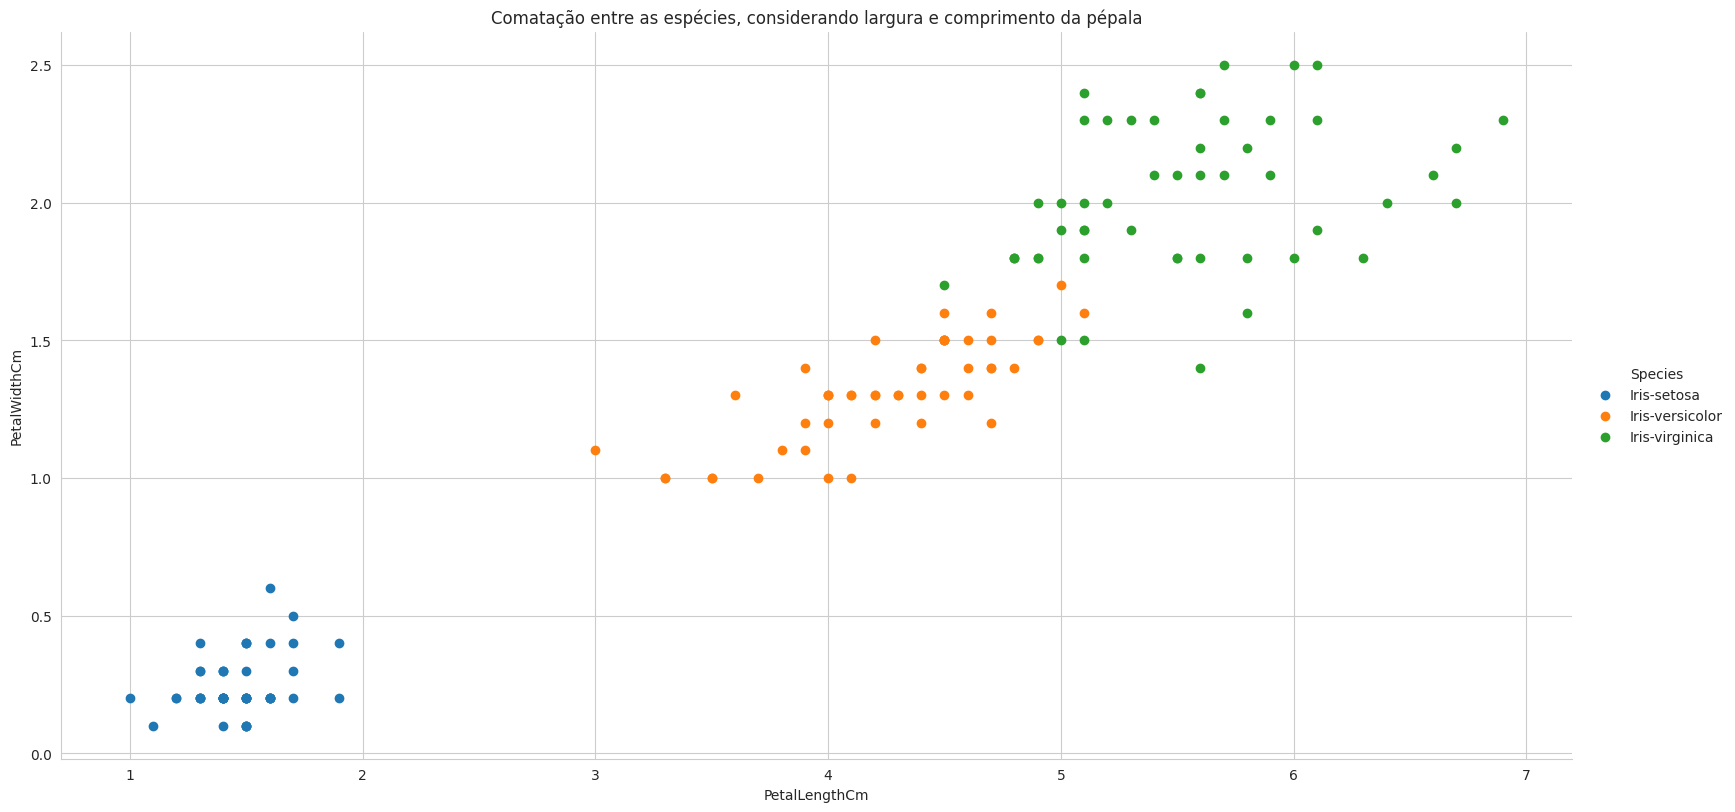

In [11]:
sns.set_style('whitegrid')

sns.FacetGrid(iris_data,
              hue='Species',
              height=8,
              aspect=2).map(plt.scatter,
                            'SepalLengthCm',
                            'SepalWidthCm').add_legend()
plt.title('Comatação entre as espécies, considerando largura e comprimento da sépala')
plt.show()



sns.FacetGrid(iris_data,
              hue='Species',
              height=8,
              aspect=2).map(plt.scatter,
                            'PetalLengthCm',
                            'PetalWidthCm').add_legend()
plt.title('Comatação entre as espécies, considerando largura e comprimento da pépala')
plt.show()


## Análise bivariada

O boxplot permite visualizar a distribuição dos dados por espécies.

A primeira célula demonstras as imperssões separadas. A segunda, as impressões em um único plot.

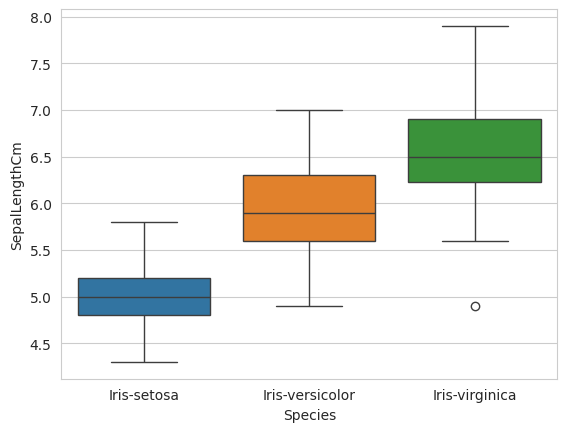

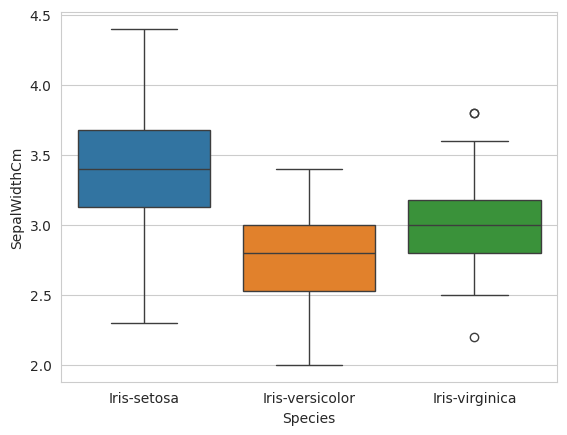

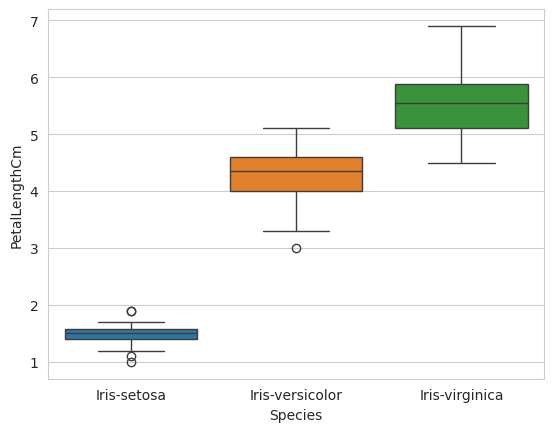

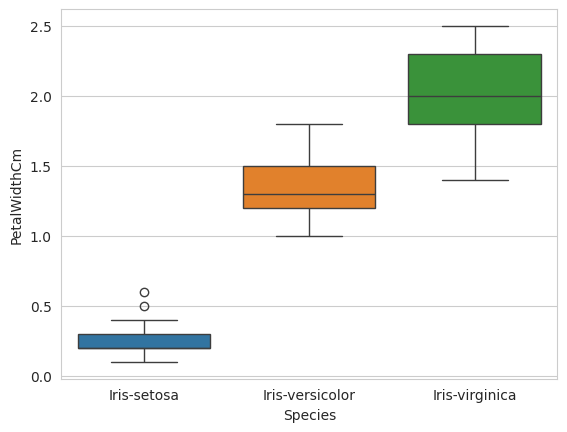

In [12]:
sns.boxplot(x='Species',
            y='SepalLengthCm',
            data=iris_data,
            hue='Species',
            native_scale=True)
# plt.grid()
plt.show()
sns.boxplot(x='Species',
            y='SepalWidthCm',
            data=iris_data,
            hue='Species',
            native_scale=True)
# plt.grid()
plt.show()
sns.boxplot(x='Species',
            y='PetalLengthCm',
            data=iris_data,
            hue='Species',
            native_scale=True)
# plt.grid()
plt.show()
sns.boxplot(x='Species',
            y='PetalWidthCm',
            data=iris_data,
            hue='Species',
            native_scale=True)
# plt.grid()
plt.show()

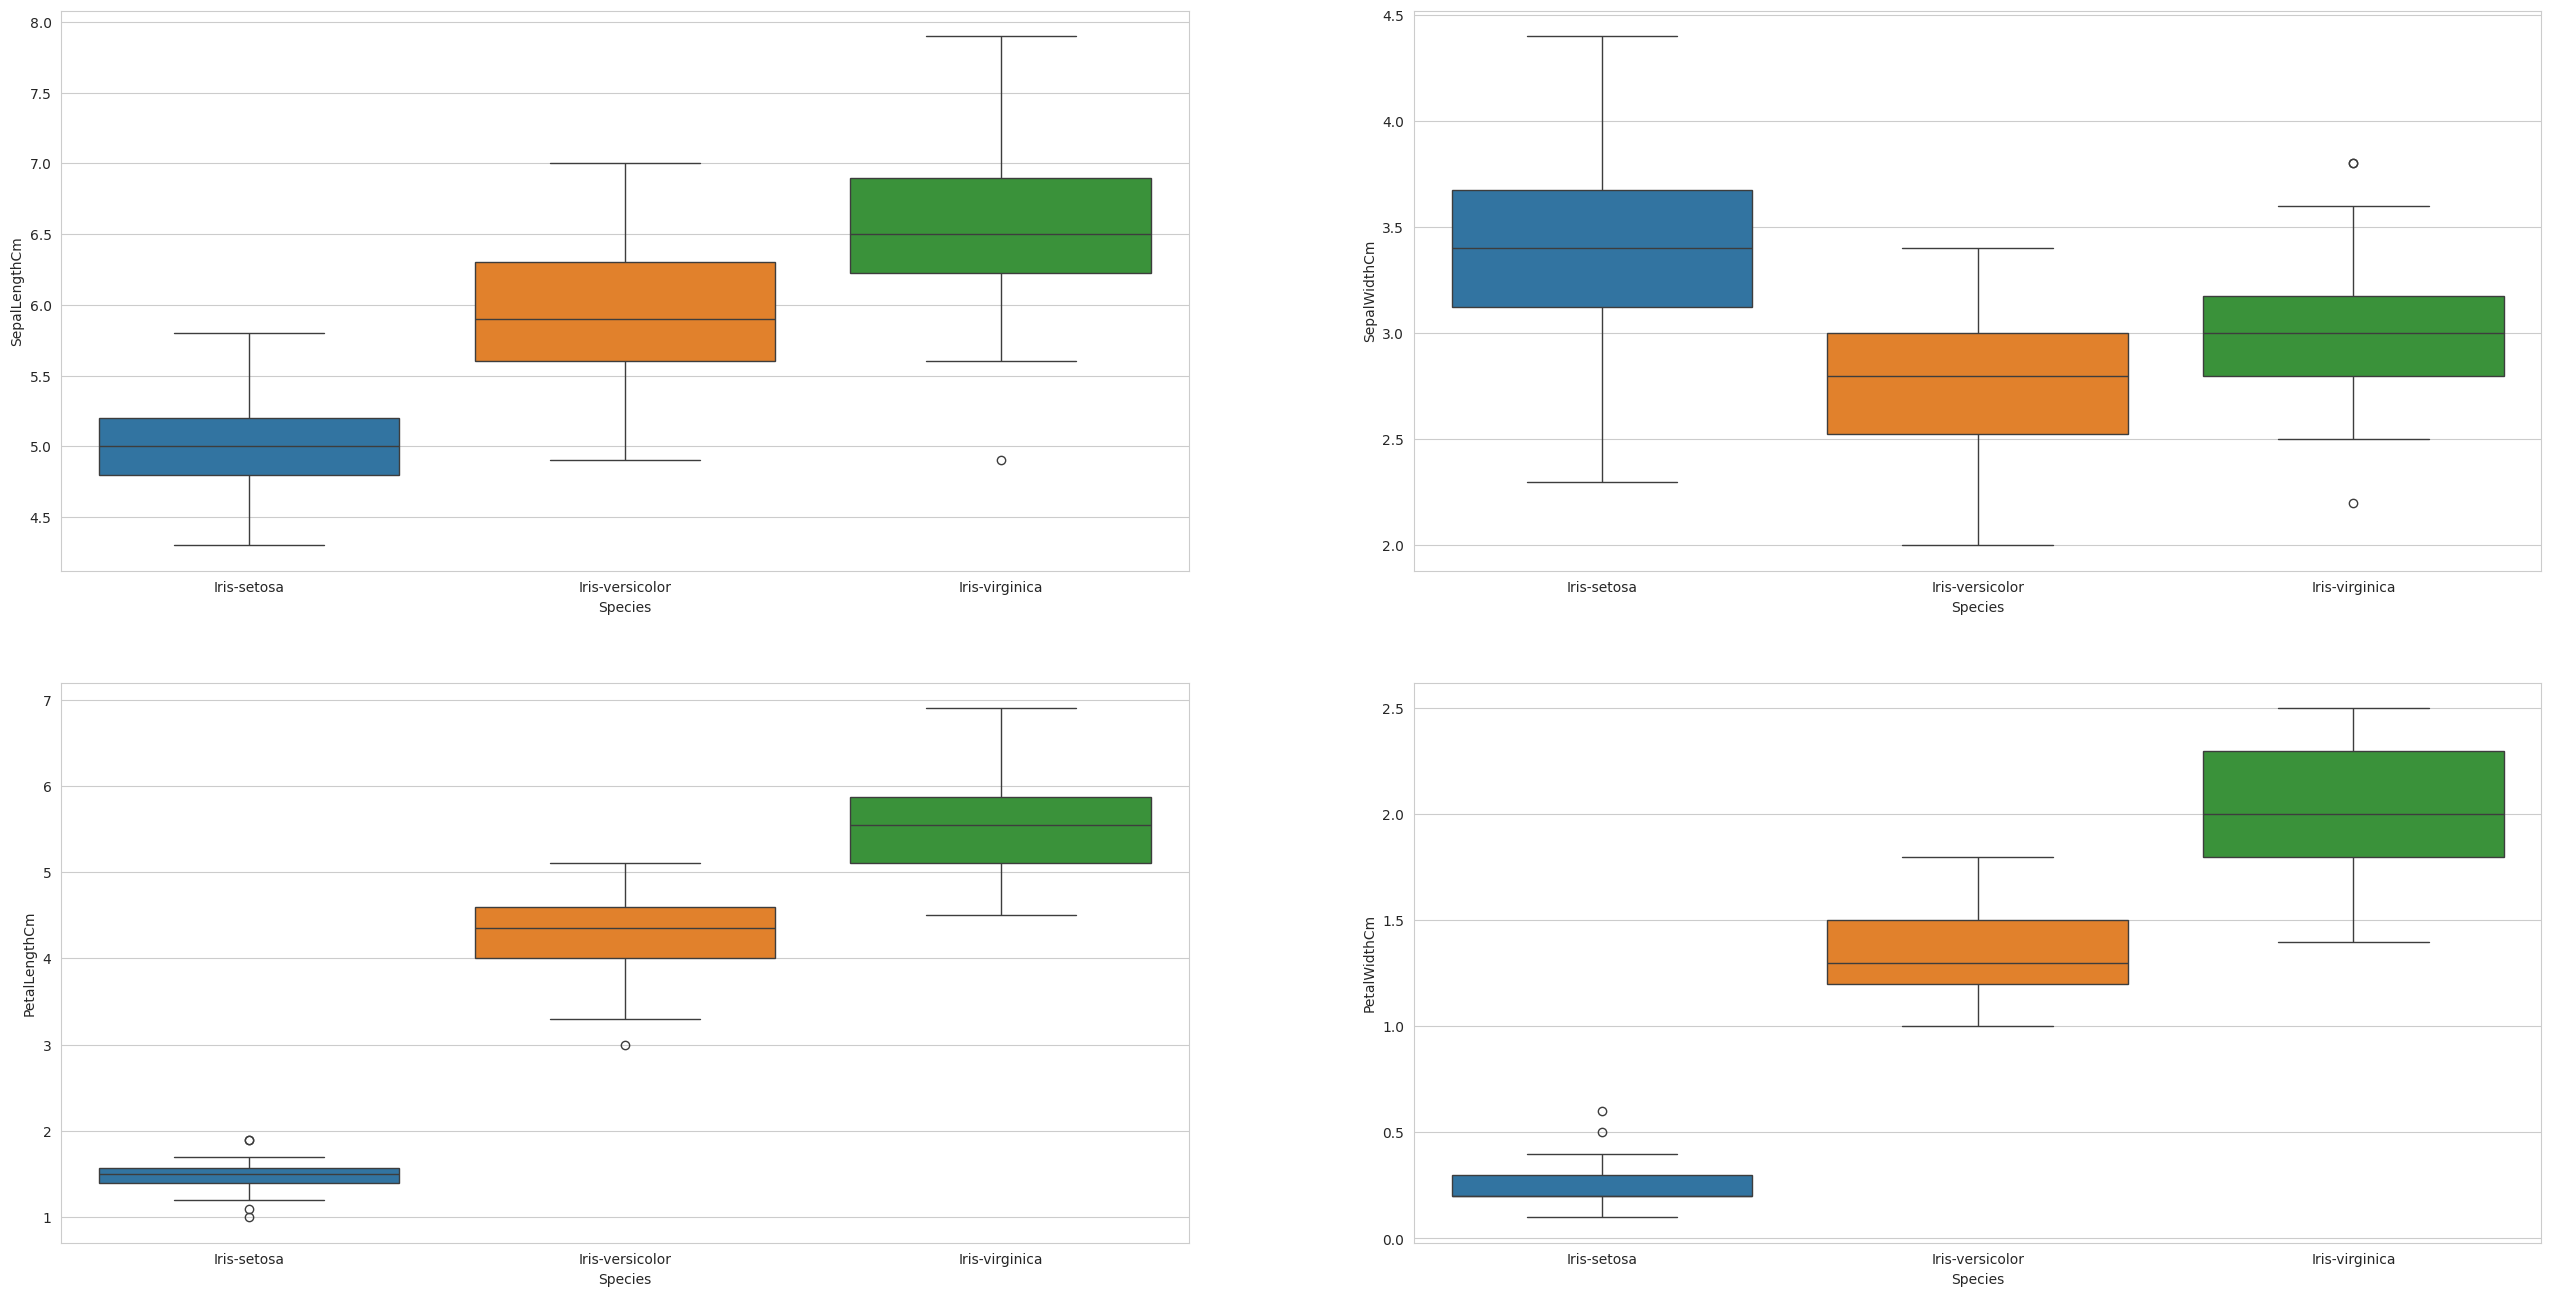

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(32, 16))

sns.boxplot(x='Species',
            y='SepalLengthCm',
            data=iris_data,
            hue='Species',
            native_scale=True,
            orient = 'v',
            ax=axes[0, 0])

sns.boxplot(x='Species',
            y='SepalWidthCm',
            data=iris_data,
            hue='Species',
            native_scale=True,
            orient = 'v',
            ax=axes[0, 1])

sns.boxplot(x='Species',
            y='PetalLengthCm',
            data=iris_data,
            hue='Species',
            native_scale=True,
            orient = 'v',
            ax=axes[1, 0])

sns.boxplot(x='Species',
            y='PetalWidthCm',
            data=iris_data,
            hue='Species',
            native_scale=True,
            orient = 'v',
            ax=axes[1, 1])

plt.show()

## Pairplot

Exibe a correlação entre as colunas da amosta.

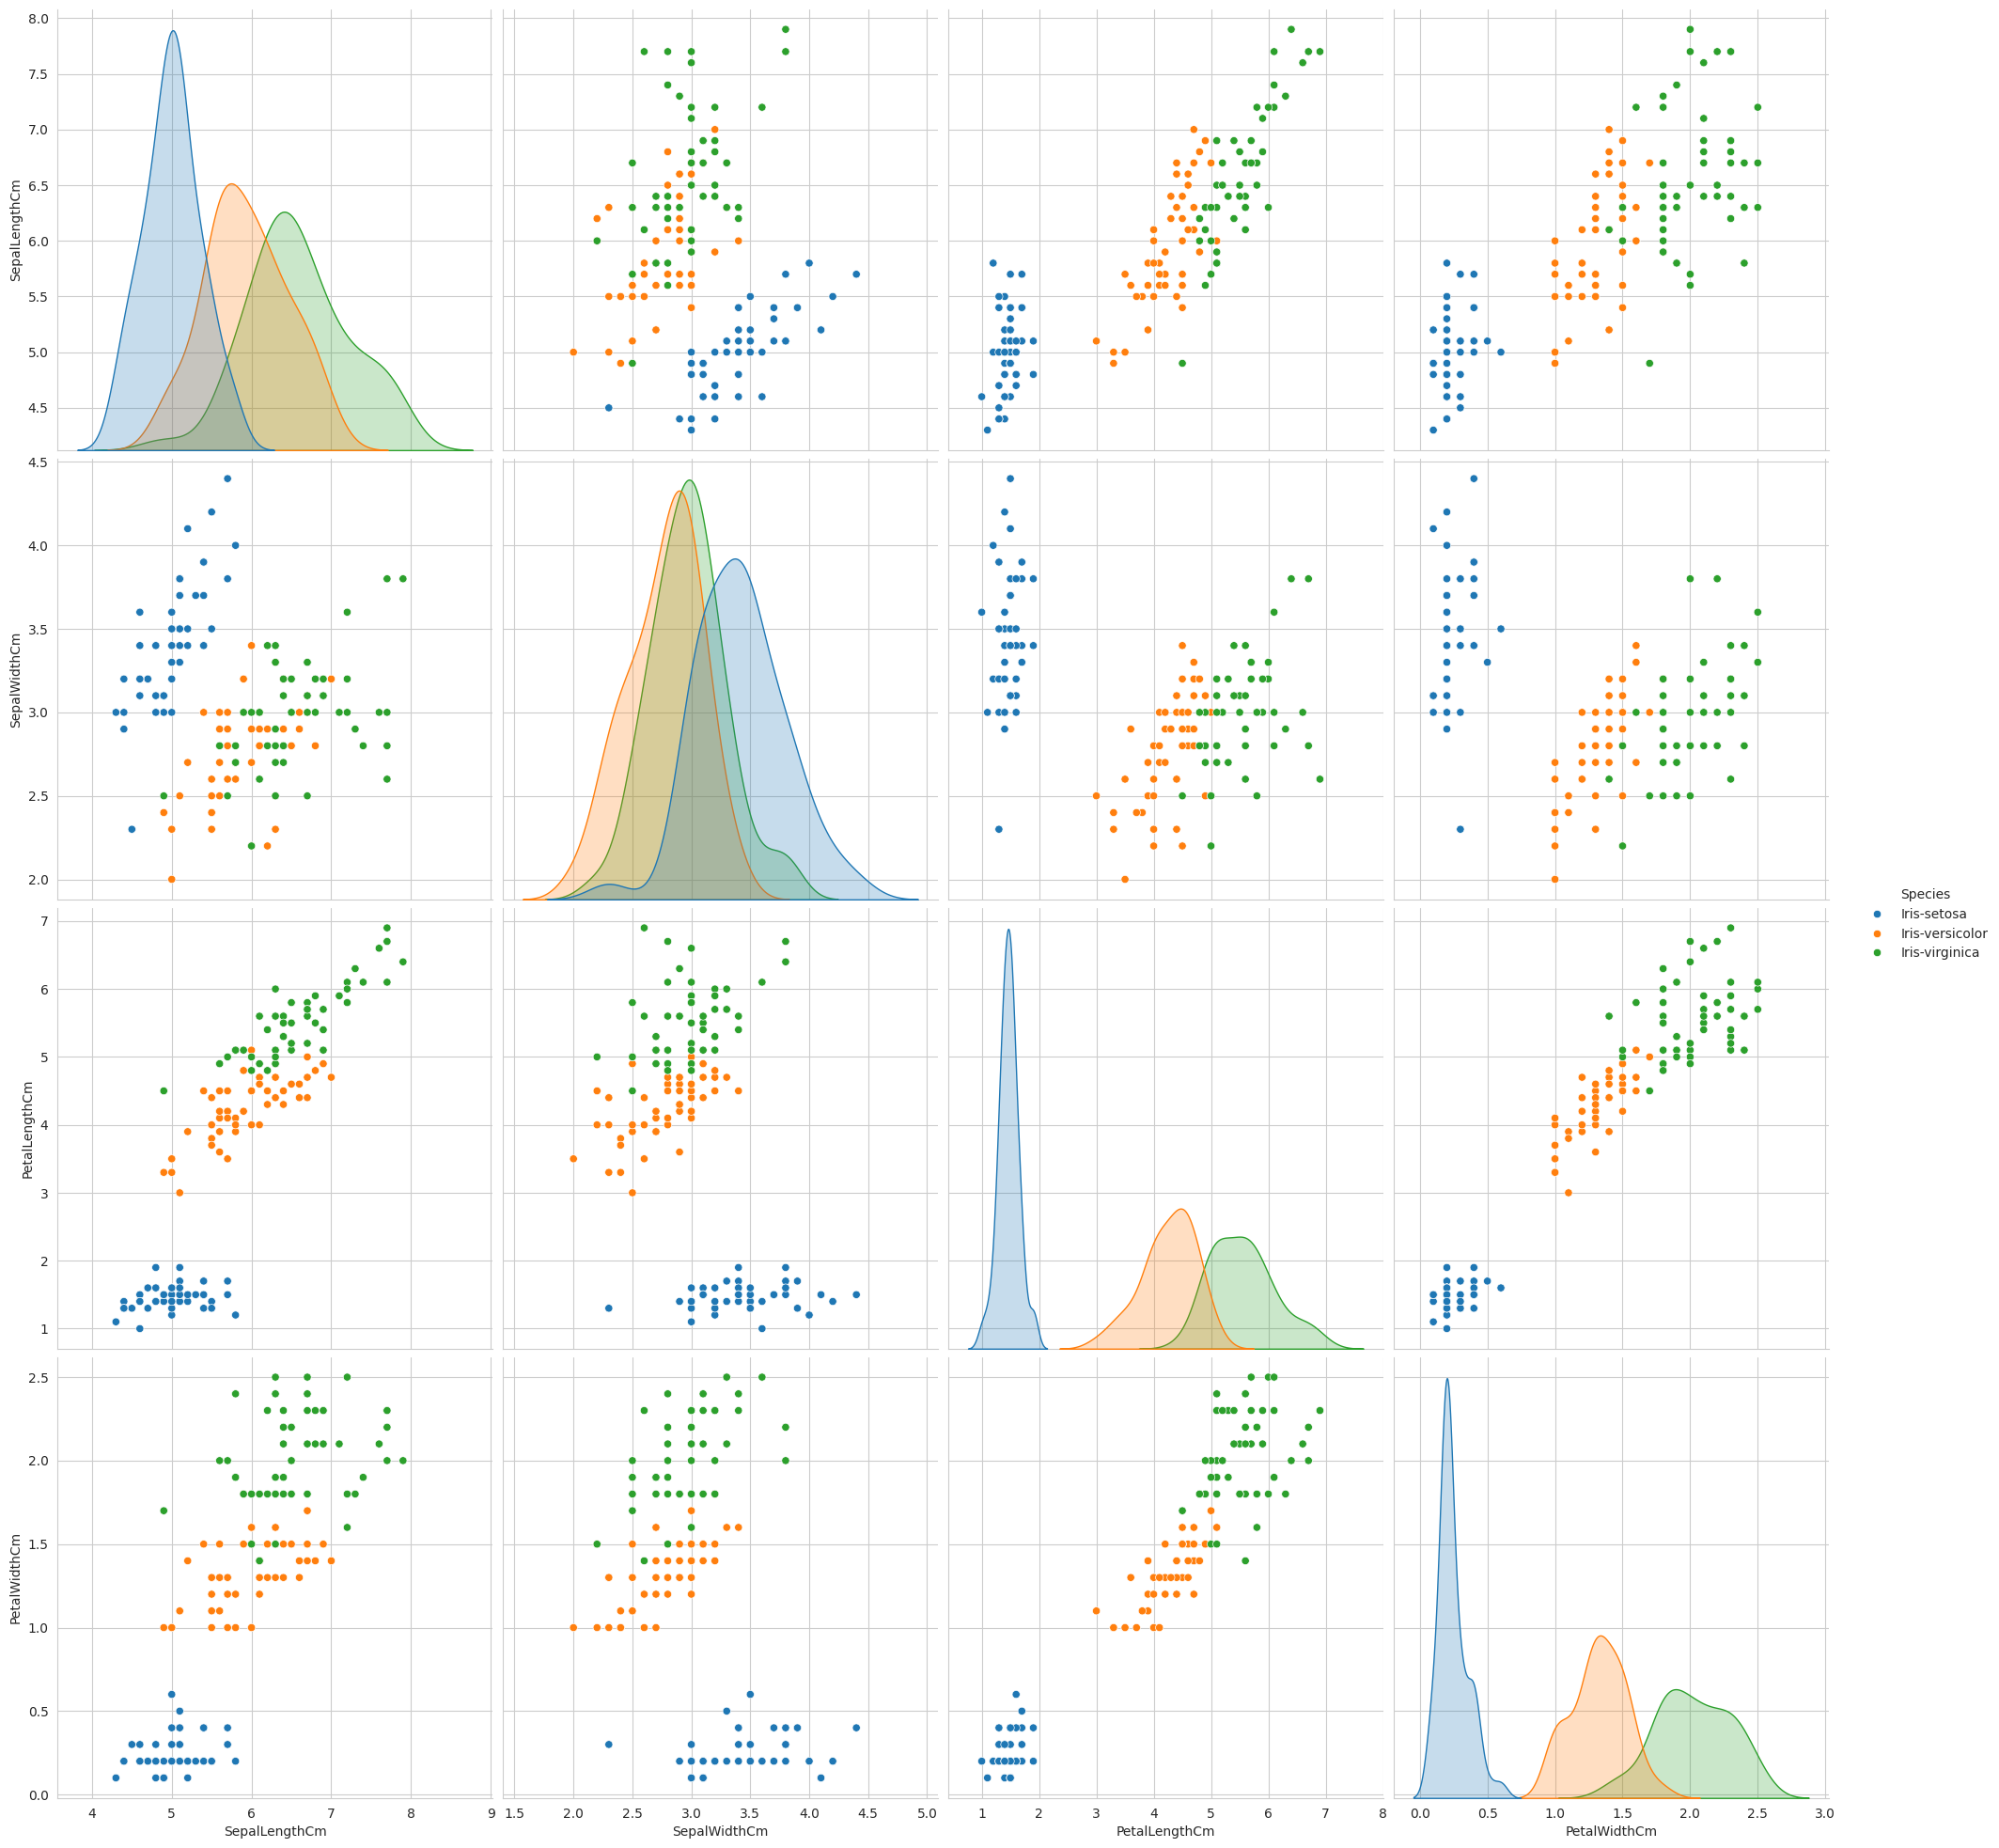

In [14]:
sns.set_style('whitegrid')
sns.pairplot(iris_data, hue='Species', height=5)
plt.show()

## Histograma e Função de densidade de probabilidade

Os próxios gráficos apresentam o histograma e a [função de densidade de probabilidade(PDF - probability density funcion)](https://pt.wikipedia.org/wiki/Fun%C3%A7%C3%A3o_de_densidade_de_probabilidade).

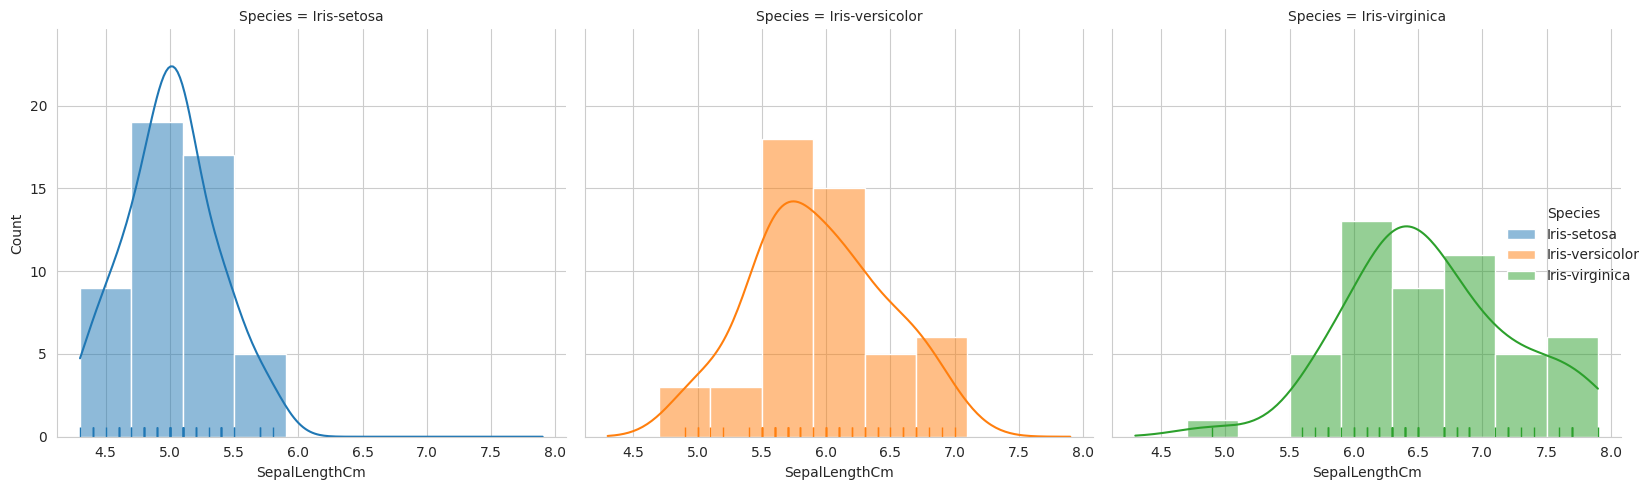

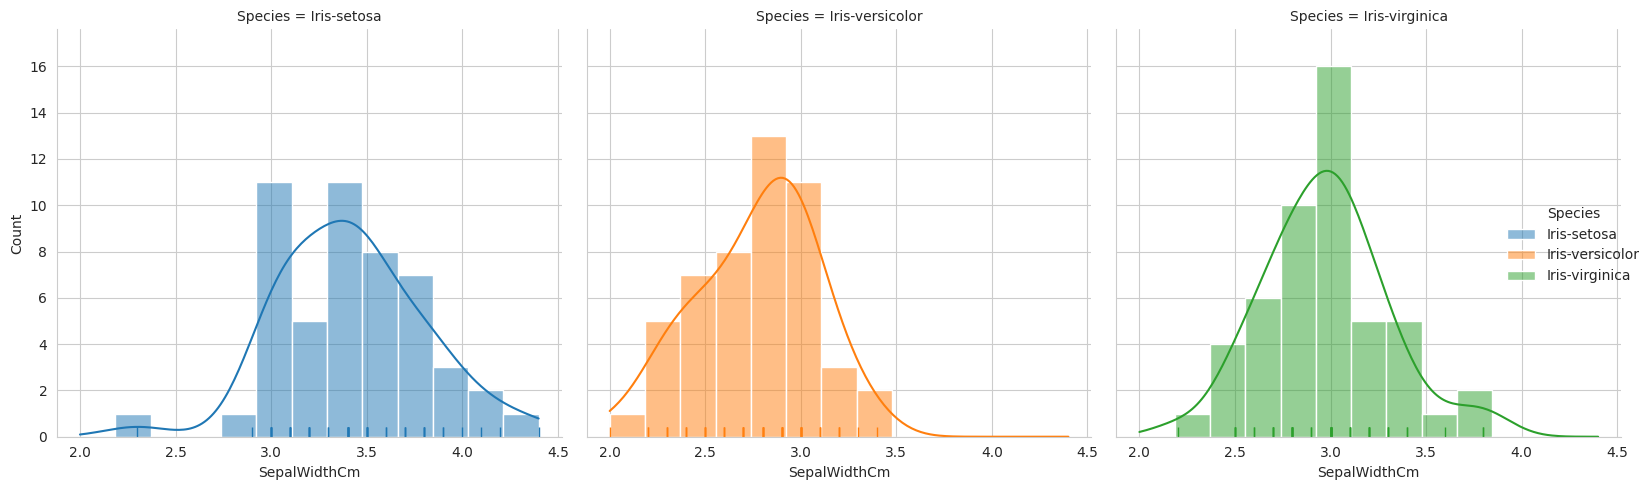

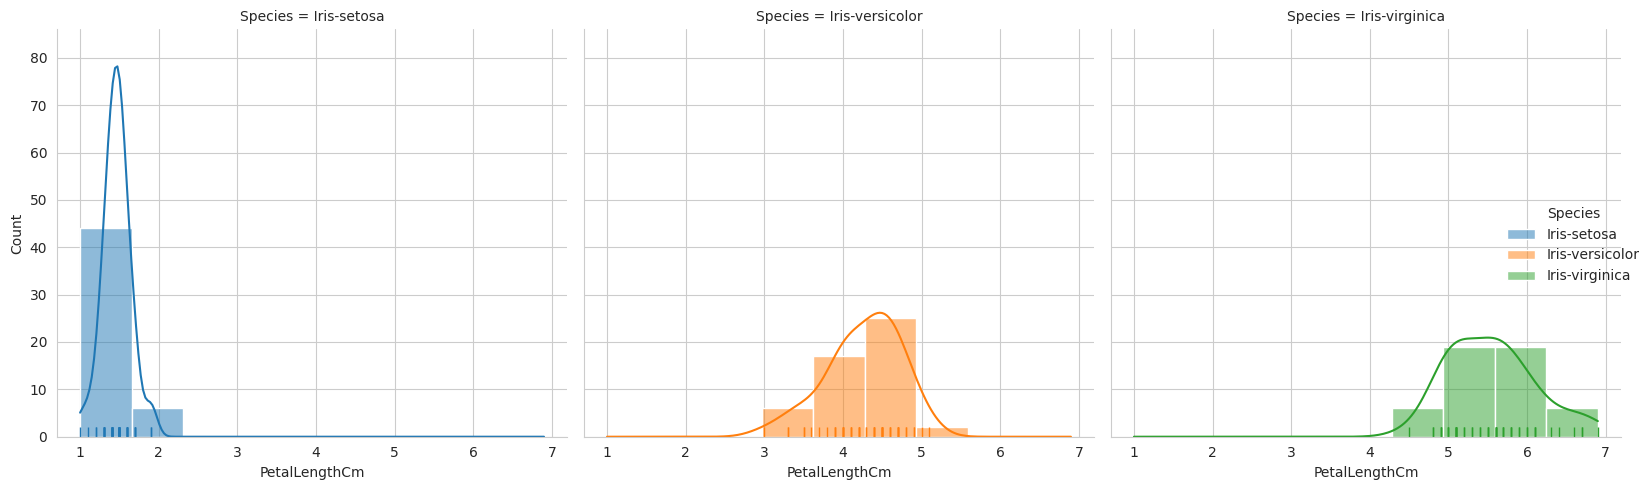

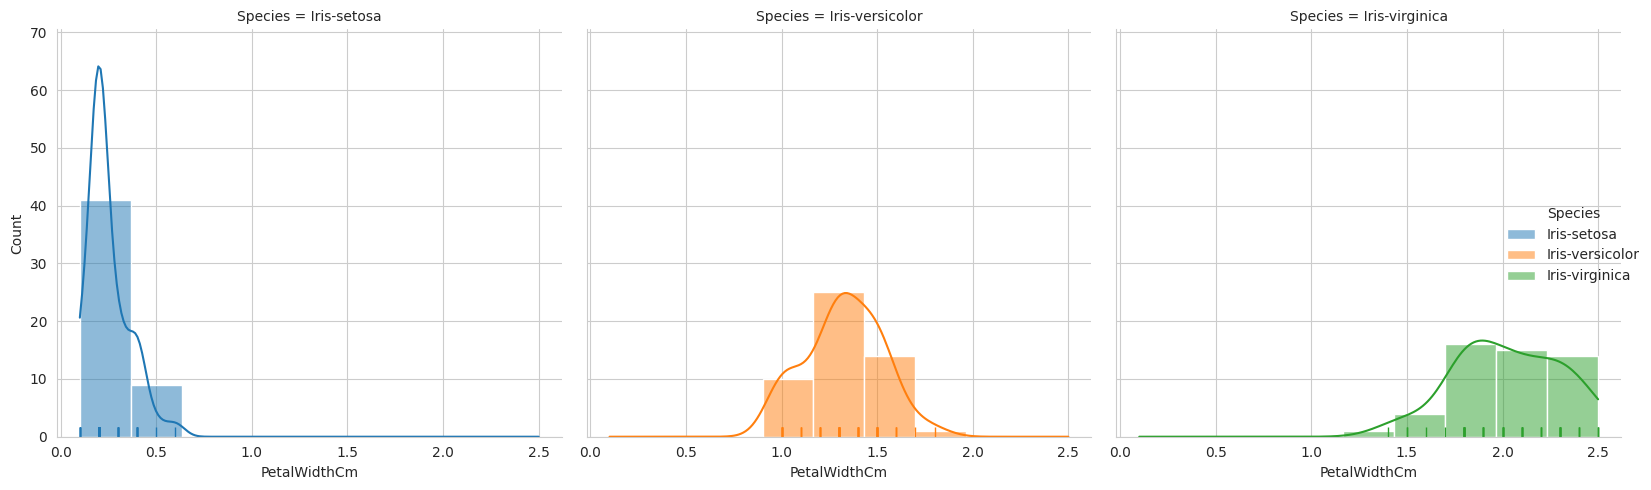

In [15]:
sns.displot(
    data=iris_data,
    x='SepalLengthCm',
    col='Species', # Para dividir em colunas como no FacetGrid
    hue="Species", # Para colorir
    kind='hist',   # Tipo de gráfico (hist é o padrão)
    kde=True,
    rug=True,
    height=5
).add_legend()


sns.displot(
    data=iris_data,
    x='SepalWidthCm',
    col='Species', # Para dividir em colunas como no FacetGrid
    hue="Species", # Para colorir
    kind='hist',   # Tipo de gráfico (hist é o padrão)
    kde=True,
    rug=True,
    height=5
).add_legend()


sns.displot(
    data=iris_data,
    x='PetalLengthCm',
    col='Species', # Para dividir em colunas como no FacetGrid
    hue="Species", # Para colorir
    kind='hist',   # Tipo de gráfico (hist é o padrão)
    kde=True,
    rug=True,
    height=5
).add_legend()


sns.displot(
    data=iris_data,
    x='PetalWidthCm',
    col='Species', # Para dividir em colunas como no FacetGrid
    hue="Species", # Para colorir
    kind='hist',   # Tipo de gráfico (hist é o padrão)
    kde=True,
    rug=True,
    height=5
).add_legend()

# sns.displot(iris_data['SepalLengthCm'],kde=True)
# plt.show()